In [4]:
from scripts.imports import *

df = pd.read_pickle('dataset.pkl')
df_grouped = df.groupby(['camera','date','lat','lon', 'beam']).agg({
    'pvpg_regressed': 'mean',
    'pv_regressed': 'mean',
    'pg_regressed': 'mean',
    'data_quantity': 'max',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean'
}).reset_index()

df_grouped = df_grouped[((df_grouped['FSC'] <= 0.1)|(df_grouped['FSC'] >= 0.9))&((df_grouped['TreeSnow'] == 0)|(df_grouped['TreeSnow'] == 1))]
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']

# df_grouped

# sns.scatterplot(data = df_grouped, x='pvpg_regressed', y='snr', hue='JointSnow', size='data_quantity')
# df[df['date'] == '25/01/2019']
# df[df['pvpg_regressed'] >= 100]

In [3]:
df_grouped

,camera,date,lat,lon,beam,pvpg_regressed,pv_regressed,pg_regressed,data_quantity,snr,FSC,TreeSnow,JointSnow,JointSnow_rounded
63,torgnon,16/08/2022,45.792268,7.528580,strong,8.065488,2.287269,0.283587,7,7.006893,0.0,0.0,0.0,0.0
64,torgnon,16/08/2022,45.801277,7.528580,strong,0.067109,1.577120,23.500822,8,7.006893,0.0,0.0,0.0,0.0
65,torgnon,16/08/2022,45.801277,7.528580,weak,0.067109,0.608004,9.059926,5,11.995934,0.0,0.0,0.0,0.0
66,torgnon,16/08/2022,45.819295,7.515652,strong,0.152898,1.320890,8.639032,4,1.478097,0.0,0.0,0.0,0.0
67,torgnon,16/08/2022,45.819295,7.515652,weak,0.152898,0.903288,5.907781,5,1.482440,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,torgnon,30/11/2018,45.846323,7.593220,weak,0.815499,1.195810,1.466355,11,19.868767,1.0,0.0,1.0,1.0
336,torgnon,30/11/2018,45.855332,7.593220,strong,0.152733,2.039446,13.352978,21,54.162903,1.0,0.0,1.0,1.0
337,torgnon,30/11/2018,45.855332,7.593220,weak,0.152733,0.767602,5.025766,11,19.868767,1.0,0.0,1.0,1.0
338,torgnon,30/11/2018,45.864341,7.593220,strong,0.984436,2.096074,2.129214,28,54.162903,1.0,0.0,1.0,1.0


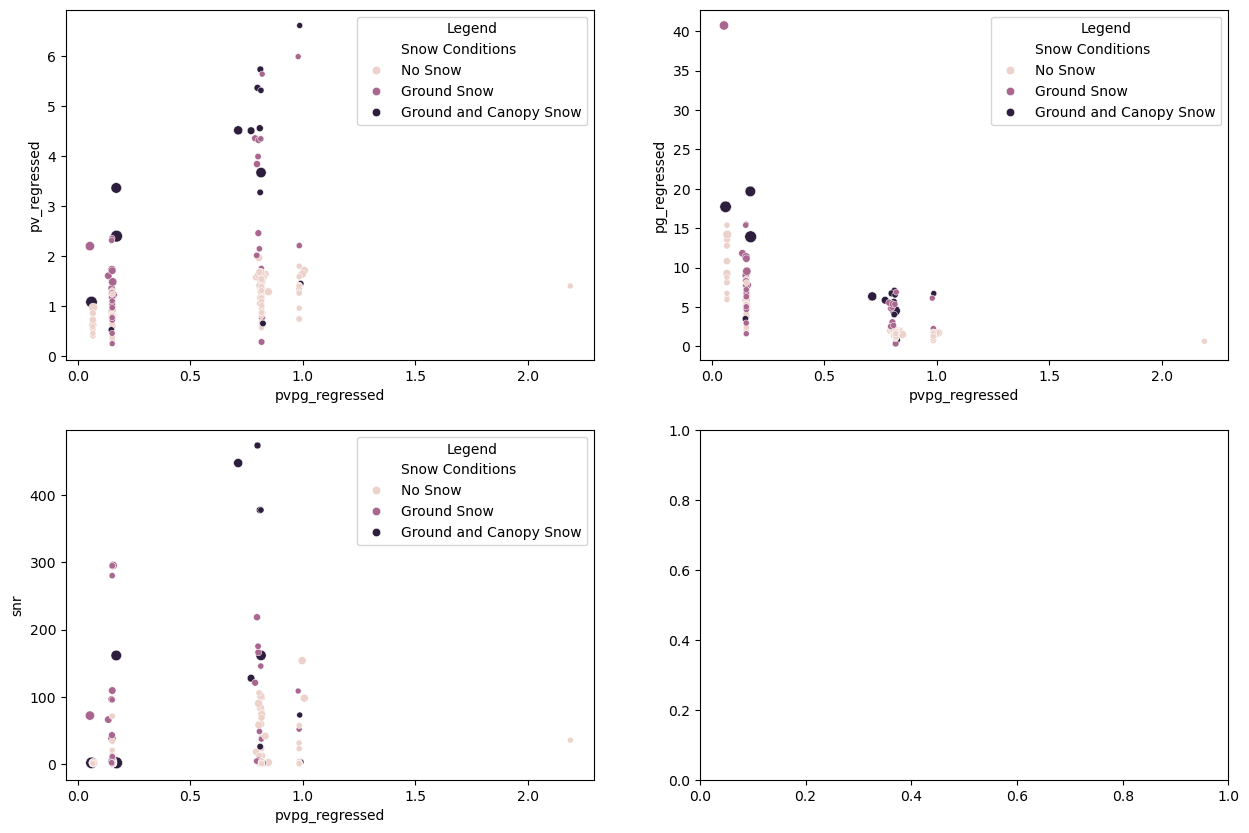

In [9]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.flatten()

df_grouped['JointSnow_rounded'] = df_grouped['JointSnow'].round()

for i, y in enumerate(['pv_regressed', 'pg_regressed', 'snr']):

    sns.scatterplot(data=df_grouped[(df_grouped['pvpg_regressed']<20)&(df_grouped['beam']=='strong')], x='pvpg_regressed', y=y, hue='JointSnow_rounded', size='data_quantity', ax=ax[i])


    handles, labels = ax[i].get_legend_handles_labels()
    # Select only specific entries for the legend
    new_handles = [handles[0], handles[1], handles[2], handles[3]]  # Adjust indices as needed
    new_labels = ['Snow Conditions', 'No Snow', 'Ground Snow', 'Ground and Canopy Snow']
    ax[i].legend(new_handles, new_labels, title="Legend")

plt.show()
# plt.ylim(0,5)